In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import glob
import scipy.stats as stats


In [2]:
file = glob.glob("*.csv")

In [3]:
file.sort()

In [4]:
file

['pt0419_1.csv', 'pt0419_2.csv', 'pt0419_3.csv']

In [5]:
dat = pd.read_csv(file[1],encoding="shift-jis",skiprows=6)

In [6]:
dat.head()

,時間(秒),総合COP左右X(cm),総合COP前後Y(cm),左プレートCOP左右X(cm),左プレートCOP前後Y(cm),左荷重(kgf),右プレートCOP左右X(cm),右プレートCOP前後Y(cm),右荷重(kgf),Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,0.00,0.572,1.412,---.---,---.---,10.028,---.---,---.---,---.---,NaN,NaN,NaN,NaN
1,0.01,0.572,1.412,---.---,---.---,10.028,---.---,---.---,---.---,NaN,NaN,NaN,NaN
2,0.02,0.572,1.412,---.---,---.---,10.028,---.---,---.---,---.---,NaN,NaN,NaN,NaN
3,0.03,0.572,1.412,---.---,---.---,10.028,---.---,---.---,---.---,NaN,NaN,NaN,NaN
4,0.04,0.572,1.412,---.---,---.---,10.028,---.---,---.---,---.---,NaN,NaN,NaN,NaN


In [7]:
dat.tail()

,時間(秒),総合COP左右X(cm),総合COP前後Y(cm),左プレートCOP左右X(cm),左プレートCOP前後Y(cm),左荷重(kgf),右プレートCOP左右X(cm),右プレートCOP前後Y(cm),右荷重(kgf),Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
5996,59.96,0.572,1.412,---.---,---.---,10.028,---.---,---.---,---.---,NaN,NaN,NaN,NaN
5997,59.97,0.572,1.412,---.---,---.---,10.028,---.---,---.---,---.---,NaN,NaN,NaN,NaN
5998,59.98,0.572,1.412,---.---,---.---,10.028,---.---,---.---,---.---,NaN,NaN,NaN,NaN
5999,59.99,0.572,1.412,---.---,---.---,10.028,---.---,---.---,---.---,NaN,NaN,NaN,NaN
6000,60.00,0.572,1.412,---.---,---.---,10.028,---.---,---.---,---.---,NaN,NaN,NaN,NaN


In [8]:
print(max(dat.iloc[:,1]))
print(min(dat.iloc[:,1]))

0.5720000000000001
0.5720000000000001


(array([   0.,    0.,    0.,    0.,    0., 6001.,    0.,    0.,    0.,
           0.]),
 array([0.912, 1.012, 1.112, 1.212, 1.312, 1.412, 1.512, 1.612, 1.712,
        1.812, 1.912]),
 <a list of 10 Patch objects>)

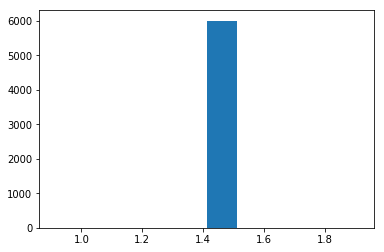

In [9]:
plt.hist(dat.iloc[:,2],bins=10)

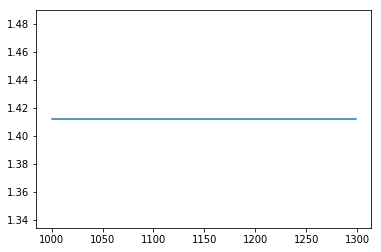

In [10]:
plt.plot(dat.iloc[1000:1300,2])

In [11]:
np.array(set(dat.iloc[:,2]))

array({1.412}, dtype=object)

In [12]:
myd = dat.iloc[:,2].values

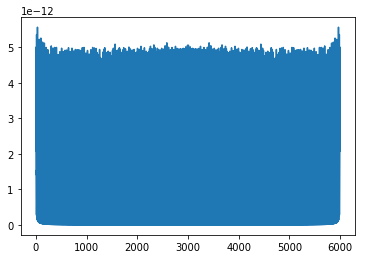

In [13]:
plt.plot(np.abs(np.fft.fft(myd)[1:]));

In [14]:
def FFT(a,wave,bias):
    '''
    高速フーリエ変換
    '''
    xfft = np.fft.fft(a, n=None, axis=-1, norm=None)
    xfft[wave:(-1)*wave]=0
    if bias:
        xfft[0]=0
    xifft = np.fft.ifft(xfft)
    return xifft.real

In [15]:
myd = dat.iloc[:,1:3].values
print(myd)
if np.log2(myd.shape[0])*10%10!=0:
    nn = np.log2(myd.shape[0])*10//10
    print(nn)
    myd = myd[0:(2**int(nn)+0),:]
    
ww = int(myd.shape[0]*5/(1/0.01))  ## データ数：１/サンプル間隔(Hz)＝波数:周波数(Hz)
                                        # hz = np.linspace(0,1.0/samp,myd.shape[0])[wave]
x = FFT(myd[:,1],ww,True)

[[0.572 1.412]
 [0.572 1.412]
 [0.572 1.412]
 ...
 [0.572 1.412]
 [0.572 1.412]
 [0.572 1.412]]
12.0


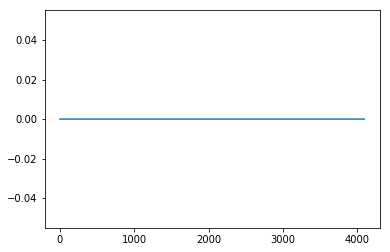

In [16]:
plt.plot(np.abs(np.fft.fft(x)[1:]));

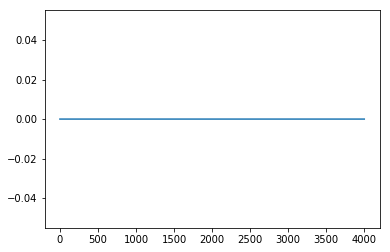

In [17]:
plt.plot(x[:4000])

(array([   0.,    0.,    0.,    0.,    0., 4096.,    0.,    0.,    0.,
           0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <a list of 10 Patch objects>)

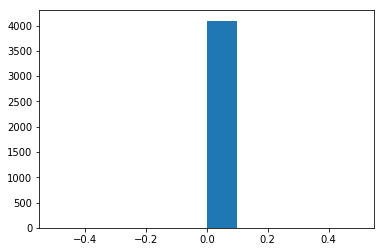

In [18]:
plt.hist(x)

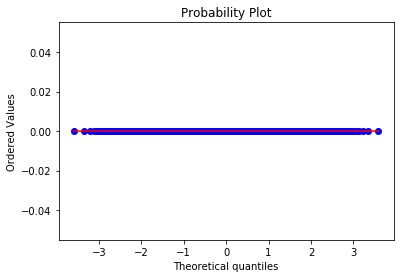

In [19]:
res = stats.probplot(x,dist="norm",plot=plt)

In [1]:
pow(2,12.0)

4096.0